<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter5_NeuralNetwork/%E4%BA%BA%E5%B7%A5%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **第五章第二节 – 人工神经网络**
这个Jupyter笔记本包含了第五章第二节的所有源代码.

### Implementation

![alt text](https://docs.google.com/uc?export=download&id=1oWrlu3M05rP8GzEWU23EgTZpDiFj2Mop)



*   Input layer ( $h^{0}$): $h^{0}(x) = x$.
*  Hidden layer ($\{h^{l}\}_{l = 1}^{L-1}$);
* Output layer ($h^{L}$).

\begin{eqnarray*}
z^{l+1} &=& {\color{blue}W^{l}} h^{l} + {\color{blue}b^{l}},\\
h^{l+1} &=& {\color{red} \sigma}(z^{l+1}),
\end{eqnarray*}
where ${\color{red}\sigma}$ is an* activation function*, which is usually non-linear, e.g. the sigmoid function $\sigma(x) = \frac{1}{1+e^{-x}}$. The parameter set ${\color{blue}\theta} = (W^{l}, b^{l})_{l =1}^{L}$}.


###ANN Classification###
The input $x$ is a multi-dimensional vector; 

The ouput $y$ is a one-hot respresenation of the class. 


The number of neurons in the output layer is the total number of classes. 

The $j^{th}$ neurons in the output layer represents the probability of the output(label) being class $j$.  

 The **cross entropy **loss function is defined as follows:

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N}\sum_{i =1}^{N} \sum_{k} \mathbb{1}( y_{i}=\text{ class }k) \log(p(y_{i} =\text{ class }k \vert x_{i})) 
\end{eqnarray*}

Note: The cross entropy between two probability distributions $p$ and $q$ is defined as 
\begin{eqnarray*}
H(p, q) =- \sum_{x} p(x)\log(q(x)).
\end{eqnarray*}

$L(\theta \vert \mathcal{D}) $ can be reformulated as 

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N} \langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle 
\end{eqnarray*}


#Pipelines of Supervised Learning Algorithms# 

The piplelines of the supervised learning algorithms are summarized as follows:

1.   Import Datasets;
2.   Take a look at the dataset (Statistical Analysis/Visualization);
3.    Pre-process the dataset to prepare for the training process (normalization/reshape data);
4.    Train a model;
5.    Validate a model;
6.    Cross Validation. 


** We will apply the shallow neural network to the MNIST dataset as a concrete example to go through the pipelines of supervised learning algorithm.**

Problem: Build an algorithm to identify the digit label from the handwritten image using the MNIST dataset. 

![alt text](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

## **预处理MNIST数据集中的数据**

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

# 加载MNIST数据集
from keras.datasets import mnist
(x_mnist_train, y_mnist_train), (x_mnist_test, y_mnist_test) = mnist.load_data()

# 将输入图像数据从矩阵转换为向量
[n_samples_train, width, height] = np.shape(x_mnist_train)
[n_samples_test, width, height] = np.shape(x_mnist_test)
x_train = x_mnist_train.reshape([n_samples_train, width*height]).astype('float32')
x_test = x_mnist_test.reshape([n_samples_test, width*height]).astype('float32')

# 标准化输入数据
x_train /= 255
x_test /= 255

# 将输出的类别由整数编码转换为one-hot编码
num_classes = 10    
y_train = to_categorical(y_mnist_train, num_classes)
y_test = to_categorical(y_mnist_test, num_classes)

## **使用浅层神经网络进行数字分类**

In [0]:
import time
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

def shallow_NN_model(n_hidden_neurons):
    """ 构建浅层神经网络 """
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    # 添加RelU激活函数的隐藏层
    model.add(Dense(n_hidden_neurons, activation='relu', input_dim=784))
    # 添加softmax激活函数的输出层
    model.add(Dense(10, activation = 'softmax'))
    # 这里我们使用Keras中SGD的常用参数设置 
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

# 创建一个模型实例
model = shallow_NN_model(n_hidden_neurons=50)

# 使用模型拟合数据集
hist_ANN = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), verbose=2)

Compiling Model ... 
Model compield in 0.15791726112365723 seconds
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 1s - loss: 0.3559 - acc: 0.8964 - val_loss: 0.1946 - val_acc: 0.9431
Epoch 2/100
 - 1s - loss: 0.1660 - acc: 0.9520 - val_loss: 0.1365 - val_acc: 0.9604
Epoch 3/100
 - 1s - loss: 0.1241 - acc: 0.9639 - val_loss: 0.1276 - val_acc: 0.9602
Epoch 4/100
 - 1s - loss: 0.1024 - acc: 0.9698 - val_loss: 0.1093 - val_acc: 0.9661
Epoch 5/100
 - 1s - loss: 0.0880 - acc: 0.9735 - val_loss: 0.0956 - val_acc: 0.9697
Epoch 6/100
 - 1s - loss: 0.0777 - acc: 0.9771 - val_loss: 0.1025 - val_acc: 0.9684
Epoch 7/100
 - 1s - loss: 0.0709 - acc: 0.9790 - val_loss: 0.0977 - val_acc: 0.9708
Epoch 8/100
 - 1s - loss: 0.0646 - acc: 0.9802 - val_loss: 0.0918 - val_acc: 0.9708
Epoch 9/100
 - 1s - loss: 0.0592 - acc: 0.9820 - val_loss: 0.0918 - val_acc: 0.9713
Epoch 10/100
 - 1s - loss: 0.0524 - acc: 0.9846 - val_loss: 0.0910 - val_acc: 0.9716
Epoch 11/100
 - 1s - loss: 0.0489 - acc: 0

## **绘制模型训练历史**

In [0]:
import matplotlib.pyplot as plt

def plot_hist_loss(hist):
  """ 绘制模型的损失函数 """
  plt.figure()
  plt.plot(hist.history['loss'], 'b', linewidth=1.5)
  plt.plot(hist.history['val_loss'], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

def plot_hist_accuracy(hist):
  """ 绘制模型的准确率 """
  plt.figure()
  plt.plot(hist.history['acc'], 'b', linewidth = 1.5)
  plt.plot(hist.history['val_acc'], 'r', linewidth = 1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

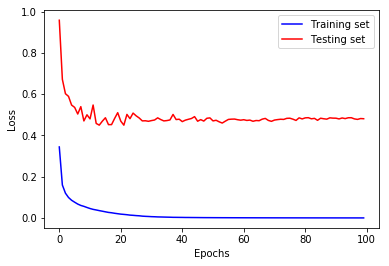

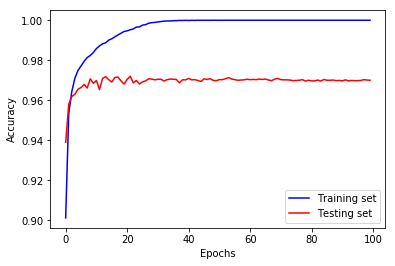

In [0]:
# 绘制模型在训练集和测试集上的损失函数和准确率
plot_hist_loss(hist_ANN)
plot_hist_accuracy(hist_ANN)

## **Assess the performance of a fitted model**


There are various measurements of the performance of the fitted models in classification problems.
*   Loss function and the accuracy;
*   Confusion matrix. 

In [0]:
score =  model.evaluate(x_test, y_test)
print(model.metrics_names)
print('Test ' + model.metrics_names[0] , score[0])
print('Test '+ model.metrics_names[1] , score[1])

10000/10000 [==============================] - 0s 34us/step
['loss', 'acc']
Test loss 0.14626251761463036
Test acc 0.9727


In [0]:
from sklearn.metrics import confusion_matrix

Y_test_prob_pred = model.predict(X_test)
Y_test_class_pred = model.predict_classes(X_test)
print(Y_test_class_pred)
print(y_test)
cm = confusion_matrix( y_test, Y_test_class_pred )
labels = np.arange(10)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[ 970    2    1    2    0    0    2    1    1    1]
 [   0 1127    1    3    0    1    1    1    1    0]
 [   6    2  998    5    4    1    3   11    2    0]
 [   0    3    5  975    1    5    0   11    1    9]
 [   3    2    2    1  954    0    6    7    1    6]
 [   6    0    1   11    1  858    6    2    4    3]
 [   7    3    1    1    3    8  931    3    1    0]
 [   1    5    8    4    1    0    1  999    0    9]
 [   6    6   13   15    4   10    5   12  896    7]
 [   1    8    0    6   10    4    2   14    1  963]]


<Figure size 432x288 with 0 Axes>

Normalized confusion matrix
[[9.89795918e-01 2.04081633e-03 1.02040816e-03 2.04081633e-03
  0.00000000e+00 0.00000000e+00 2.04081633e-03 1.02040816e-03
  1.02040816e-03 1.02040816e-03]
 [0.00000000e+00 9.92951542e-01 8.81057269e-04 2.64317181e-03
  0.00000000e+00 8.81057269e-04 8.81057269e-04 8.81057269e-04
  8.81057269e-04 0.00000000e+00]
 [5.81395349e-03 1.93798450e-03 9.67054264e-01 4.84496124e-03
  3.87596899e-03 9.68992248e-04 2.90697674e-03 1.06589147e-02
  1.93798450e-03 0.00000000e+00]
 [0.00000000e+00 2.97029703e-03 4.95049505e-03 9.65346535e-01
  9.90099010e-04 4.95049505e-03 0.00000000e+00 1.08910891e-02
  9.90099010e-04 8.91089109e-03]
 [3.05498982e-03 2.03665988e-03 2.03665988e-03 1.01832994e-03
  9.71486762e-01 0.00000000e+00 6.10997963e-03 7.12830957e-03
  1.01832994e-03 6.10997963e-03]
 [6.72645740e-03 0.00000000e+00 1.12107623e-03 1.23318386e-02
  1.12107623e-03 9.61883408e-01 6.72645740e-03 2.24215247e-03
  4.48430493e-03 3.36322870e-03]
 [7.30688935e-03 3.13152401e-0

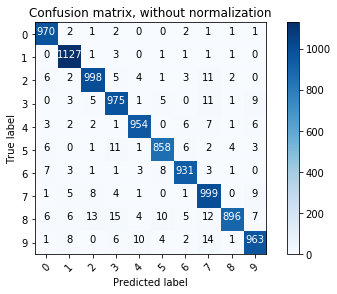

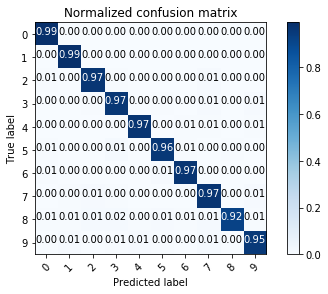

In [0]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b = 0)

## The code for the function plot_confusion_matrix() is attributed to http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=list(map(str, labels)), title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes=list(map(str, labels)), normalize=True, title='Normalized confusion matrix')
